KNN

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
import pandas as pd

# Load the dataset
file_path = "/workspaces/Heart-Attack-Predictor/data/raw/heart_attack_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Preview data
df.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [24]:
# Basic info
df.info()

# Check for missing values
print(df.isnull().sum())

# Summary statistics
df.describe()

# Check unique values for categorical columns
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 10:
        print(f"{col} ➜ {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [25]:
# Example cleaning steps
# 1. Drop rows/columns with excessive missing values
df = df.dropna(thresh=len(df.columns) - 2)  # drop rows with more than 2 missing

# 2. Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # for numeric columns

# 3. Standardize categorical values
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')  # clean column names

# Optional: Convert categorical columns to numeric if needed
# df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# 4. Remove duplicates
df = df.drop_duplicates()

# 5. Check for invalid values (e.g., negative age, out-of-range cholesterol)
# df = df[df['age'] > 0]  # if age column exists


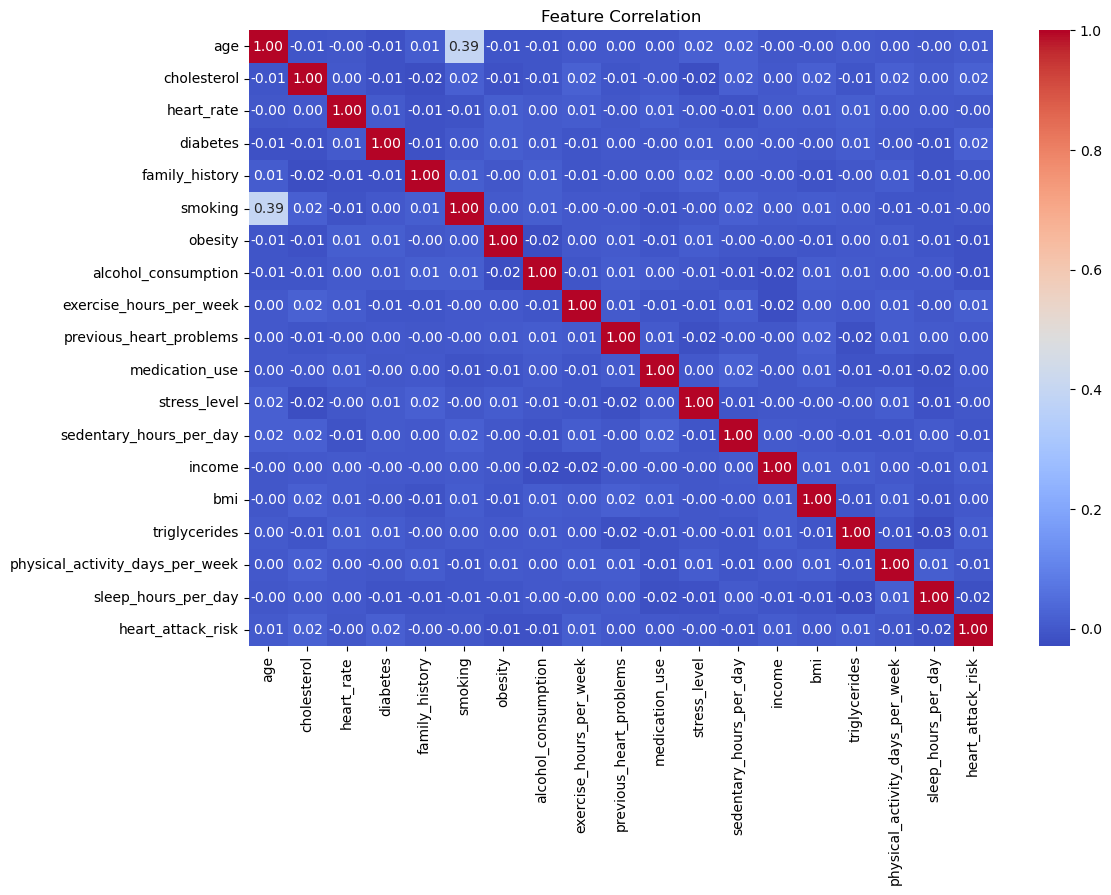

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [35]:
cleaned_path = "/workspaces/Heart-Attack-Predictor/notebooks/FC212041_Isivara/heart_attack_cleaned.csv"
df.to_csv(cleaned_path, index=False)


In [37]:
import pandas as pd
import os

# Load raw data
raw_path = "/workspaces/Heart-Attack-Predictor/data/raw/heart_attack_prediction_dataset.csv"
df = pd.read_csv(raw_path)

# Basic cleaning
df.dropna(thresh=len(df.columns) - 2, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.drop_duplicates(inplace=True)

# Ensure 'cleaned' directory exists
cleaned_dir = "/workspaces/Heart-Attack-Predictor/notebooks/FC212041_Isivara"
os.makedirs(cleaned_dir, exist_ok=True)

# Save cleaned data
cleaned_path = os.path.join(cleaned_dir, "heart_attack_cleaned.csv")
df.to_csv(cleaned_path, index=False)

print(f"✅ Cleaned data saved to: {cleaned_path}")


✅ Cleaned data saved to: /workspaces/Heart-Attack-Predictor/notebooks/FC212041_Isivara/heart_attack_cleaned.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load the dataset
df = pd.read_csv('/workspaces/Heart-Attack-Predictor/notebooks/FC212041_Isivara/heart_attack_cleaned.csv')

In [4]:
print(df.columns)

Index(['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure',
       'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity',
       'alcohol_consumption', 'exercise_hours_per_week', 'diet',
       'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day', 'country',
       'continent', 'hemisphere', 'heart_attack_risk'],
      dtype='object')


In [5]:
# Drop unnecessary columns
cols_to_drop = ['patient_id', 'country', 'continent', 'hemisphere', 'income']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print(df.columns)

Index(['age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol_consumption',
       'exercise_hours_per_week', 'diet', 'previous_heart_problems',
       'medication_use', 'stress_level', 'sedentary_hours_per_day', 'bmi',
       'triglycerides', 'physical_activity_days_per_week',
       'sleep_hours_per_day', 'heart_attack_risk'],
      dtype='object')


In [7]:
# Split 'Blood Pressure' into systolic/diastolic
df[['systolic_pressure', 'diastolic_pressure']] = df['blood_pressure'].str.split('/', expand=True).astype(int)
df = df.drop(columns=['blood_pressure'])
print(df.columns)

Index(['age', 'sex', 'cholesterol', 'heart_rate', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week',
       'diet', 'previous_heart_problems', 'medication_use', 'stress_level',
       'sedentary_hours_per_day', 'bmi', 'triglycerides',
       'physical_activity_days_per_week', 'sleep_hours_per_day',
       'heart_attack_risk', 'systolic_pressure', 'diastolic_pressure'],
      dtype='object')


In [8]:
# One-hot encode 'Sex' and 'Diet'
df_encoded = pd.get_dummies(df, columns=['sex', 'diet'], drop_first=True)

In [9]:
# Convert boolean columns to integers
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [10]:
df_encoded.head()

,age,cholesterol,heart_rate,diabetes,family_history,smoking,obesity,alcohol_consumption,exercise_hours_per_week,previous_heart_problems,...,bmi,triglycerides,physical_activity_days_per_week,sleep_hours_per_day,heart_attack_risk,systolic_pressure,diastolic_pressure,sex_Male,diet_Healthy,diet_Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,...,31.251233,286,0,6,0,158,88,1,0,0
1,21,389,98,1,1,1,1,1,1.813242,1,...,27.194973,235,1,7,0,165,93,1,0,1
2,21,324,72,1,0,0,0,0,2.078353,1,...,28.176571,587,4,4,0,174,99,0,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,36.464704,378,3,4,0,163,100,1,0,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,21.809144,231,1,5,0,91,88,1,0,1


In [11]:
# Define X and y
X = df_encoded.drop(columns=['heart_attack_risk'])
y = df_encoded['heart_attack_risk']

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5641756988020536
Confusion Matrix:
 [[839 286]
 [478 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69      1125
           1       0.34      0.24      0.28       628

    accuracy                           0.56      1753
   macro avg       0.49      0.49      0.48      1753
weighted avg       0.53      0.56      0.54      1753

